In [146]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#reading the data
data_orig=pd.read_csv(r'/Users/sundarrapeti/Downloads/CarPrice_Assignment.csv')

In [3]:
#making another dataframe
df=data_orig

In [4]:
#splitting the original carname column to extract the company and car name
df[['company','car']]=df.CarName.str.split(n=1,expand=True)

In [5]:
#handling the data discrepancies in the company name like converting maxda to mazda,toyouta to toyota etc
df['company']=df['company'].replace(['maxda'],'mazda')

df['company']=df['company'].replace(['Nissan'],'nissan')

df['company']=df['company'].replace(['vokswagen','vw'],'volkswagen')

df['company']=df['company'].replace(['toyouta'],'toyota')

df['company']=df['company'].replace(['porcshce'],'porsche')

In [6]:
# viewing the data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,car
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [180]:
# car_ID and CarName and car columns  column can be dropped
# car_ID is like unique row identifier and has no significance
#CarName and car columns can be dropped because we have company as new column name
#df=df.drop(['car_ID','CarName','car'],axis=1)

#Visualizing the data

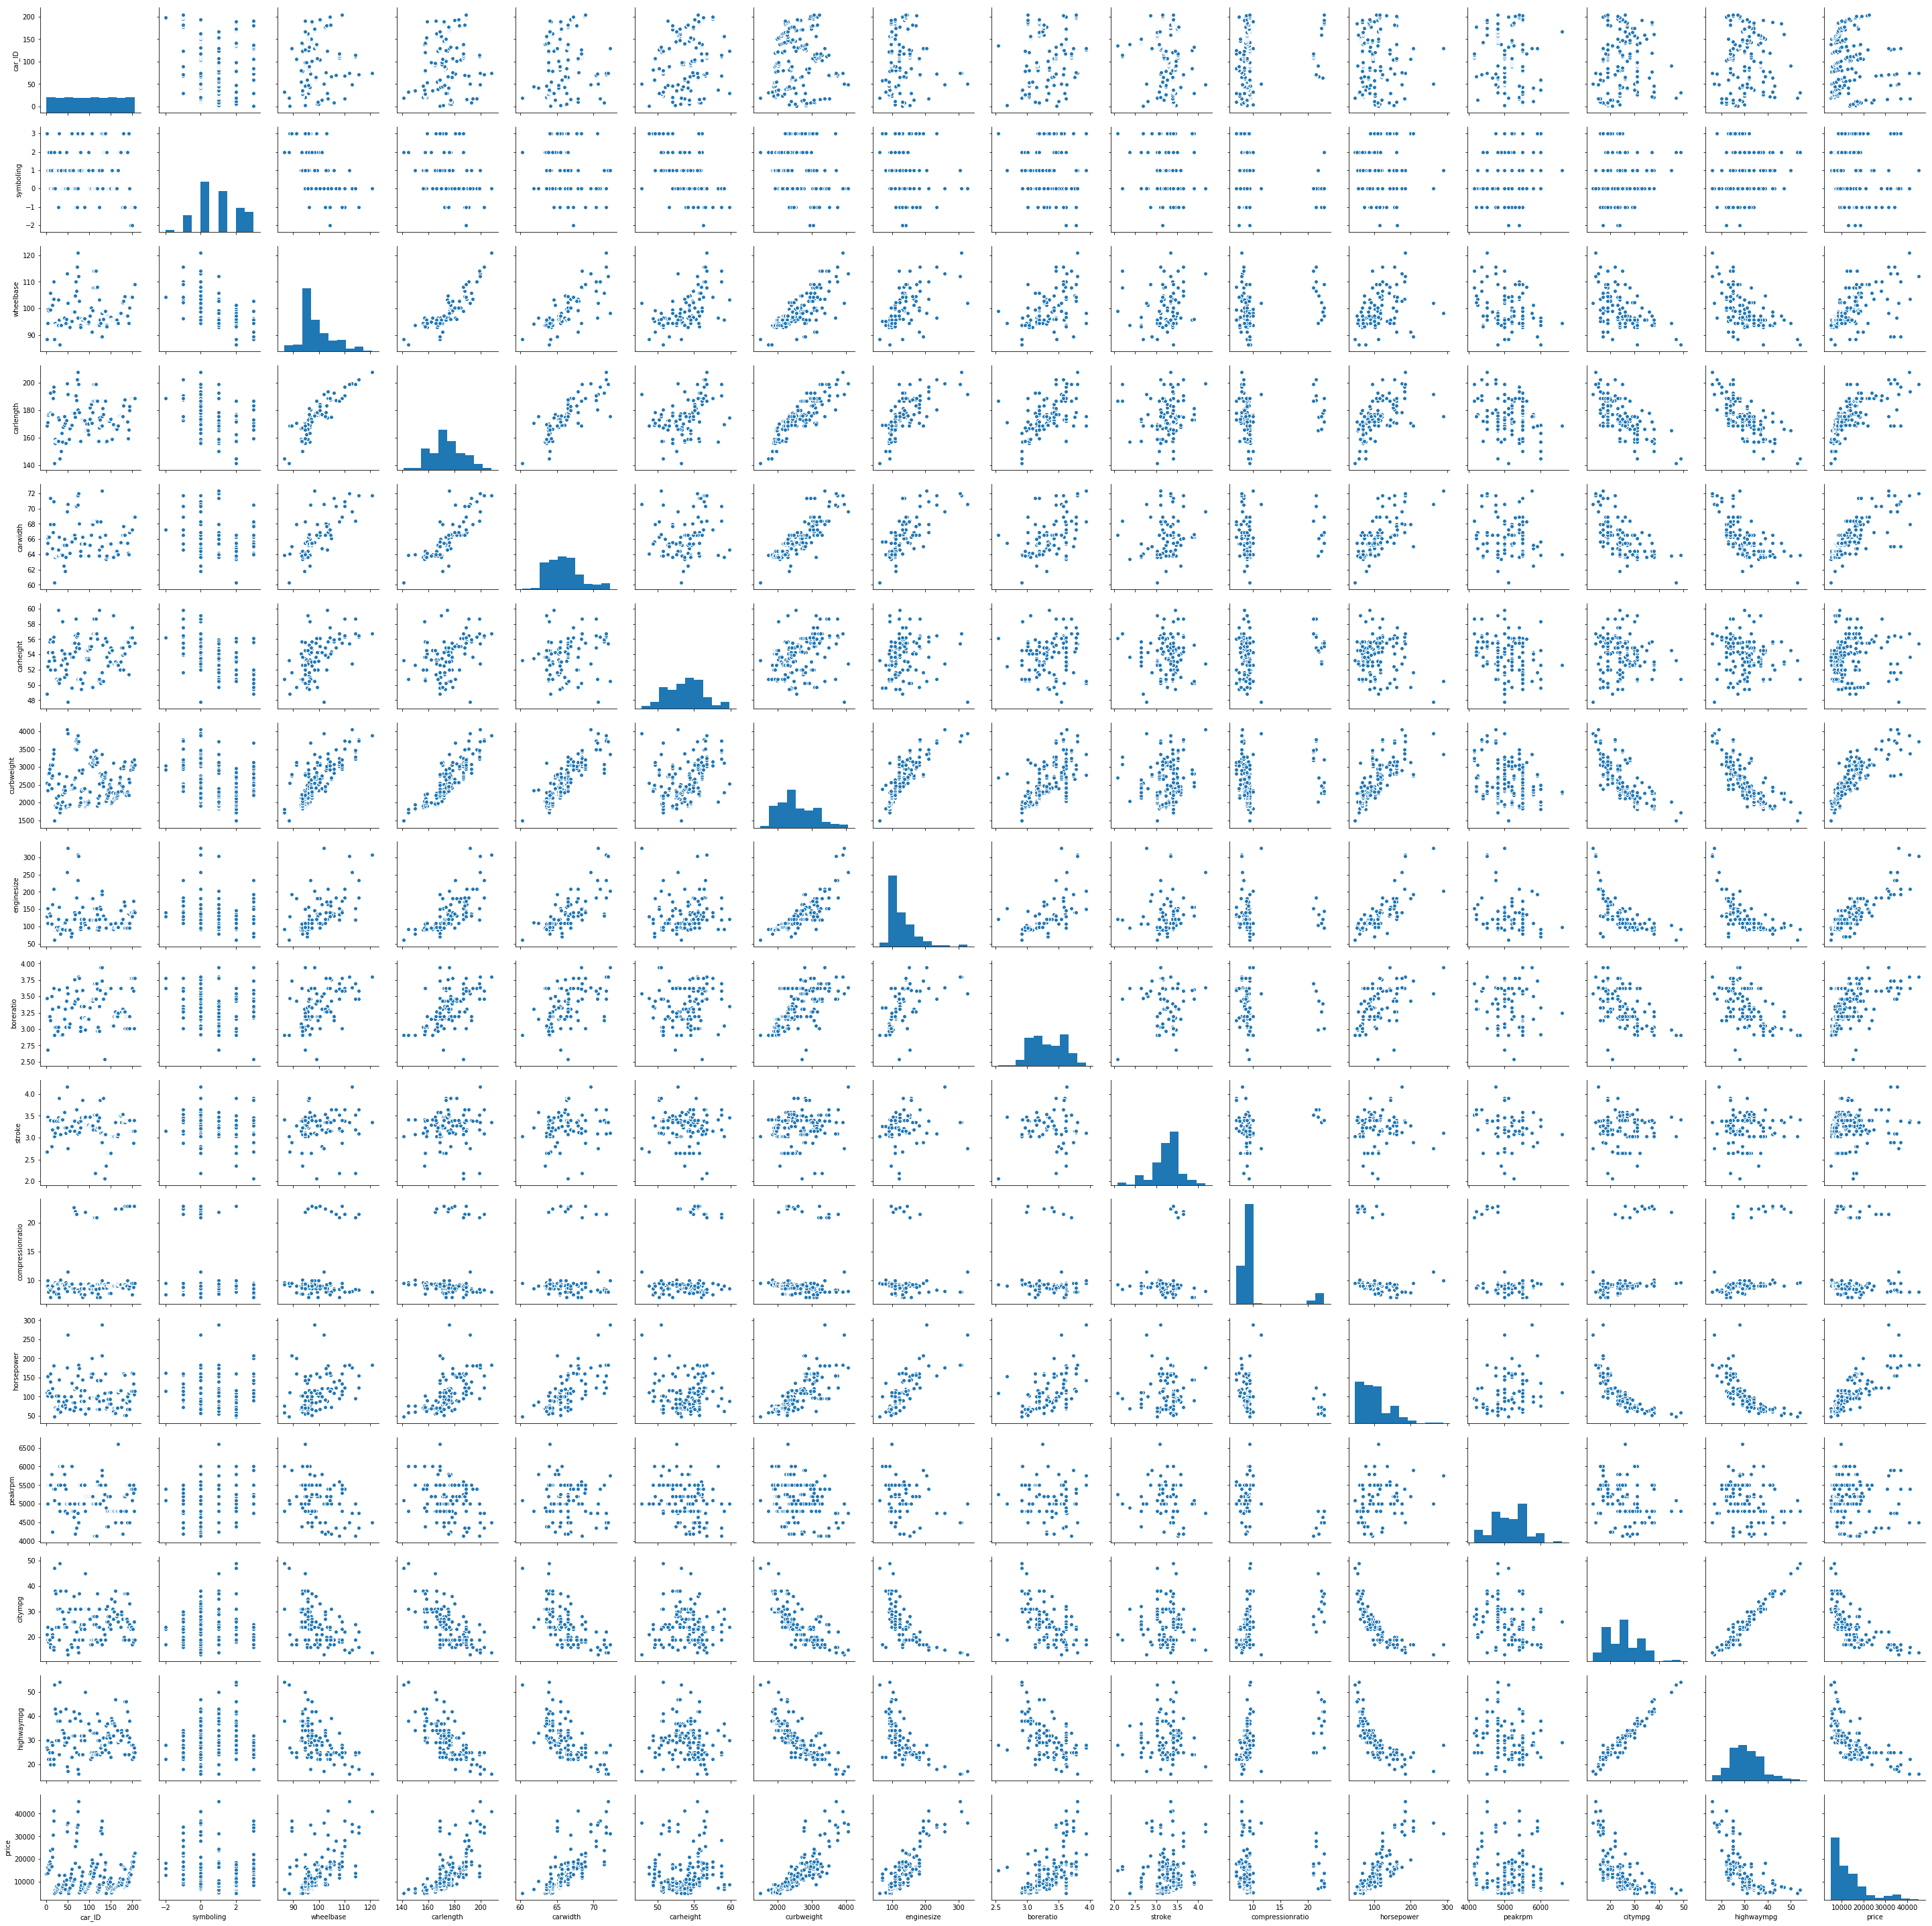

In [8]:
#Visualizing the numeric data using pair plot
sns.pairplot(df)
plt.show()

In [143]:
#Inferences
# CAR_ID is unique identifier for each record and will not have any significance
#Symboling does not have any linear relation ship with price
#Remaining attributes show some linear relation with some outliers

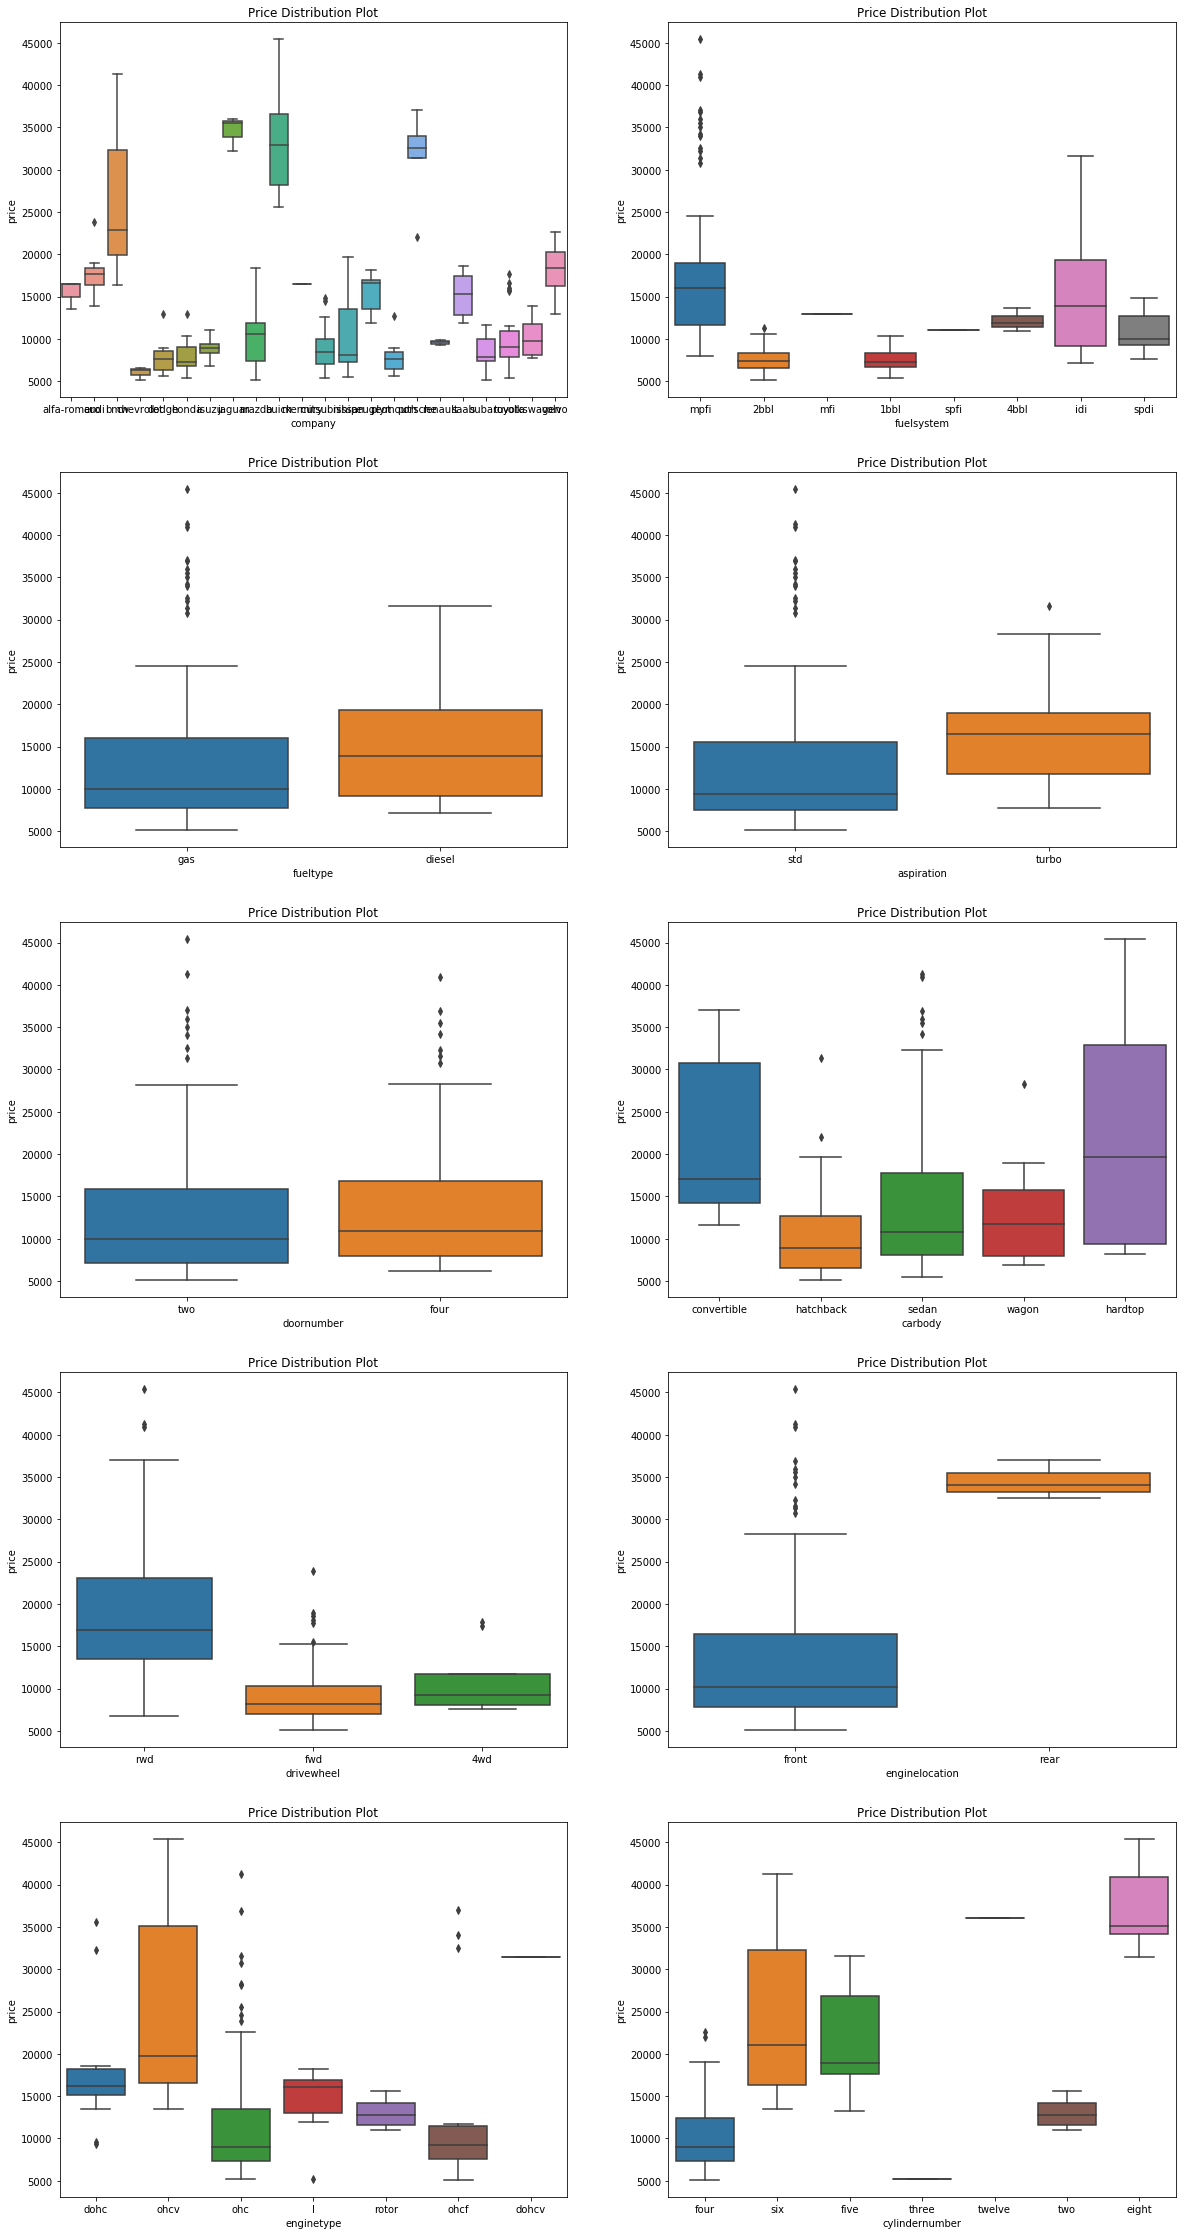

In [15]:
#Visualizing the categorical data
plt.figure(figsize=(20,40))
plt.subplot(5,2,1)
plt.title('Price Distribution Plot')
sns.boxplot(x='company',y='price',data=df)

plt.subplot(5,2,2)
plt.title('Price Distribution Plot')
sns.boxplot(x='fuelsystem',y='price',data=df)

plt.subplot(5,2,3)
plt.title('Price Distribution Plot')
sns.boxplot(x='fueltype',y='price',data=df)

plt.subplot(5,2,4)
plt.title('Price Distribution Plot')
sns.boxplot(x='aspiration',y='price',data=df)

plt.subplot(5,2,5)
plt.title('Price Distribution Plot')
sns.boxplot(x='doornumber',y='price',data=df)

plt.subplot(5,2,6)
plt.title('Price Distribution Plot')
sns.boxplot(x='carbody',y='price',data=df)

plt.subplot(5,2,7)
plt.title('Price Distribution Plot')
sns.boxplot(x='drivewheel',y='price',data=df)

plt.subplot(5,2,8)
plt.title('Price Distribution Plot')
sns.boxplot(x='enginelocation',y='price',data=df)

plt.subplot(5,2,9)
plt.title('Price Distribution Plot')
sns.boxplot(x='enginetype',y='price',data=df)

plt.subplot(5,2,10)
plt.title('Price Distribution Plot')
sns.boxplot(x='cylindernumber',y='price',data=df)

plt.show()

In [182]:
# converting the categorical variables with ONLY TWO POSSIBLE values fueltype,aspiration, doornum, enginelocation
#df['fueltype']=df['fueltype'].map({'gas':0,'diesel':1})
#df['aspiration']=df['aspiration'].map({'std':0,'turbo':1})
#df['doornumber']=df['doornumber'].map({'two':0,'four':1})
#df['enginelocation']=df['enginelocation'].map({'front':0,'rear':1})

In [183]:

df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Deriving New Columns

In [32]:
temp=df

In [33]:
# Deriving the new column sq_ft. This is the total area of the car
temp['sq_ft']=temp['carlength']//12 * temp['carwidth']//12

In [34]:
# BELOW ARE THE SPECIFICS FOR THE CAR CLASSIFICATION IN USA AS PER WIKI
# CLASSIFICATION OF THE CARS INTO 5 CATEGORIES MINI, SMALL, MIDSIZE,LARGE,VERYLARGE BASED ON SQ_FT & CURB WEIGHT
#IM IMPLEMENTING THE SAME LOGIC GIVEN BELOW IN THE FORMULA
#US Insurance Institute for Highway Safety | Highway Loss Data Institute 'Guide to car size groups' (includes minivans)[30]					
#	Shadow (square footage of exterior length × width)				
#Curb Weight	70 to 80 sq ft (6.5–7.4 m2)	81 to 90 sq ft (7.5–8.4 m2)	91 to 100 sq ft (8.5–9.3 m2)	101 to 110 sq ft (9.4–10.2 m2)	>110 sq ft (10.2 m2)
#2,001 to 2,500 lb (900–1,150 kg)	Mini	Small	Small	Small	Midsize
#2,501 to 3,000 lb (1,150–1,350 kg)	Small	Small	Midsize	Midsize	Midsize
#3,001 to 3,500 lb (1,350–1,600 kg)	Small	Midsize	Midsize	Large	Large
#3,501 to 4,000 lb (1,600–1,800 kg)	Small	Midsize	Large	Large	Very Large
#>4,000 lb (1,800 kg)	Midsize	Midsize	Large	Very Large	Very Large


In [35]:
temp['size_group'] = np.where(((temp['sq_ft'] <= 80) & (temp['curbweight'] <= 2500)),'Mini',
np.where((((temp['sq_ft'] >= 81) & (temp['sq_ft']<=110)) & ((temp.curbweight >= 2001) & (temp.curbweight<=2500))),'Small',
np.where(((temp['sq_ft']<=90 ) & ((temp['curbweight'] >= 2501) & (temp['curbweight']<=3000))),'Small',
np.where(((temp['sq_ft']<=90 ) & ((temp['curbweight'] >= 3001) & (temp['curbweight']<=4000))),'Small',
np.where(((temp['sq_ft']>110 ) & ((temp['curbweight'] >= 2001) & (temp['curbweight']<=2500))),'Midsize',
np.where(((temp['sq_ft']>91 ) & ((temp['curbweight'] >= 2501) & (temp['curbweight']<=3000))),'Midsize',
np.where((((temp['sq_ft'] >= 81) & (temp['sq_ft']<=100)) & ((temp['curbweight'] >= 3001) & (temp['curbweight']<=3500))),'Midsize',
np.where((((temp['sq_ft'] >= 81) & (temp['sq_ft']<=90 )) & ((temp['curbweight'] >= 3501) & (temp['curbweight']<=4000))),'Midsize',
np.where(((( temp['sq_ft']<=90 ) & (temp['curbweight'] >= 4000))),'Midsize',
np.where(((temp['sq_ft']>101 ) & ((temp['curbweight'] >= 3001) & (temp['curbweight']<=3500))),'Large',
np.where((((temp['sq_ft'] >= 91) & (temp['sq_ft']<=110 )) & ((temp['curbweight'] >= 3501) & (temp['curbweight']<=4000))),'Large',
np.where(((( temp['sq_ft']>=91) & (temp['sq_ft']<=100)) & (temp['curbweight'] >= 4000 )),'Large',
np.where(((temp['sq_ft']>110 ) & ((temp['curbweight'] >= 3501) & (temp['curbweight']<=4000))),'Very Large',
np.where(((temp['sq_ft']>101 ) & (temp['curbweight'] >= 4000)),'Very Large',
'others'))))))))))))))

In [36]:
#checking to see if any unclassified records are present in the data
temp.size_group.unique()

array(['Small', 'Mini', 'Midsize', 'Large'], dtype=object)

In [42]:
temp.columns

Index([u'fueltype', u'aspiration', u'doornumber', u'carbody', u'drivewheel',
       u'enginelocation', u'wheelbase', u'carlength', u'carwidth',
       u'carheight', u'curbweight', u'enginetype', u'cylindernumber',
       u'enginesize', u'fuelsystem', u'boreratio', u'stroke',
       u'compressionratio', u'horsepower', u'peakrpm', u'citympg',
       u'highwaympg', u'price', u'sq_ft', u'size_group'],
      dtype='object')

In [41]:
#Dropping unwanted columns
temp=temp.drop(['car_ID','CarName','car','symboling','company'],axis=1)

ValueError: labels ['car_ID' 'CarName' 'car' 'symboling' 'company'] not contained in axis

In [43]:
# define function to generate the dummies for the categorical variables

def get_dummies(var,df):
    new=pd.get_dummies(df[var],drop_first=True)
    df=pd.concat([df,new],axis=1)
    df.drop([var], axis = 1, inplace = True)
    return df

In [44]:
temp=get_dummies('fueltype',temp)
temp=get_dummies('aspiration',temp)
temp=get_dummies('doornumber',temp)
temp=get_dummies('enginelocation',temp)
temp=get_dummies('carbody',temp)
temp=get_dummies('drivewheel',temp)
temp=get_dummies('enginetype',temp)
temp=get_dummies('cylindernumber',temp)
temp=get_dummies('fuelsystem',temp)
temp=get_dummies('size_group',temp)

In [45]:
temp.columns

Index([u'wheelbase', u'carlength', u'carwidth', u'carheight', u'curbweight',
       u'enginesize', u'boreratio', u'stroke', u'compressionratio',
       u'horsepower', u'peakrpm', u'citympg', u'highwaympg', u'price',
       u'sq_ft', u'gas', u'turbo', u'two', u'rear', u'hardtop', u'hatchback',
       u'sedan', u'wagon', u'fwd', u'rwd', u'dohcv', u'l', u'ohc', u'ohcf',
       u'ohcv', u'rotor', u'five', u'four', u'six', u'three', u'twelve',
       u'two', u'2bbl', u'4bbl', u'idi', u'mfi', u'mpfi', u'spdi', u'spfi',
       u'Midsize', u'Mini', u'Small'],
      dtype='object')

In [20]:
temp.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


### SPLITTING INTO TRAIN TEST DATA SETS

In [79]:
df_train,df_test=train_test_split(temp,train_size=0.8,random_state=100)

In [80]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Midsize,Mini,Small
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,1,0,0,0,1,0
157,95.7,166.3,64.4,52.8,2109,98,3.19,3.03,9.0,70,...,1,0,0,0,0,0,0,0,1,0
81,96.3,173.0,65.4,49.4,2328,122,3.35,3.46,8.5,88,...,1,0,0,0,0,0,0,0,1,0
32,93.7,150.0,64.0,52.6,1837,79,2.91,3.07,10.1,60,...,0,0,0,0,0,0,0,0,1,0
99,97.2,173.4,65.2,54.7,2324,120,3.33,3.47,8.5,97,...,1,0,0,0,0,0,0,0,1,0


In [81]:
#scaling of variables
scaler=MinMaxScaler()

In [82]:
vars=['wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio',
      'horsepower','peakrpm','citympg','highwaympg']

In [84]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Midsize,Mini,Small
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000
mean,0.404605,0.519899,0.454726,0.482927,0.398579,123.670732,0.489983,0.542159,0.202866,0.221037,...,0.353659,0.018293,0.103659,0.006098,0.414634,0.042683,0.0,0.036585,0.591463,0.341463
std,0.197731,0.197651,0.179980,0.205820,0.202330,39.470438,0.203913,0.153546,0.255795,0.164011,...,0.479569,0.134418,0.305751,0.078087,0.494168,0.202760,0.0,0.188317,0.493069,0.475653
min,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.272414,0.409756,0.308333,0.341667,0.247673,97.000000,0.293651,0.464646,0.098437,0.090625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.491667,0.347944,110.000000,0.468254,0.555556,0.125000,0.183333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
75%,0.475862,0.615041,0.516667,0.641667,0.522789,137.250000,0.682540,0.616162,0.150000,0.283333,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,326.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [85]:
#df_train1=df_train.drop(['fuelsystem','enginetype','cylindernumber'],axis=1)
df_train1=df_train

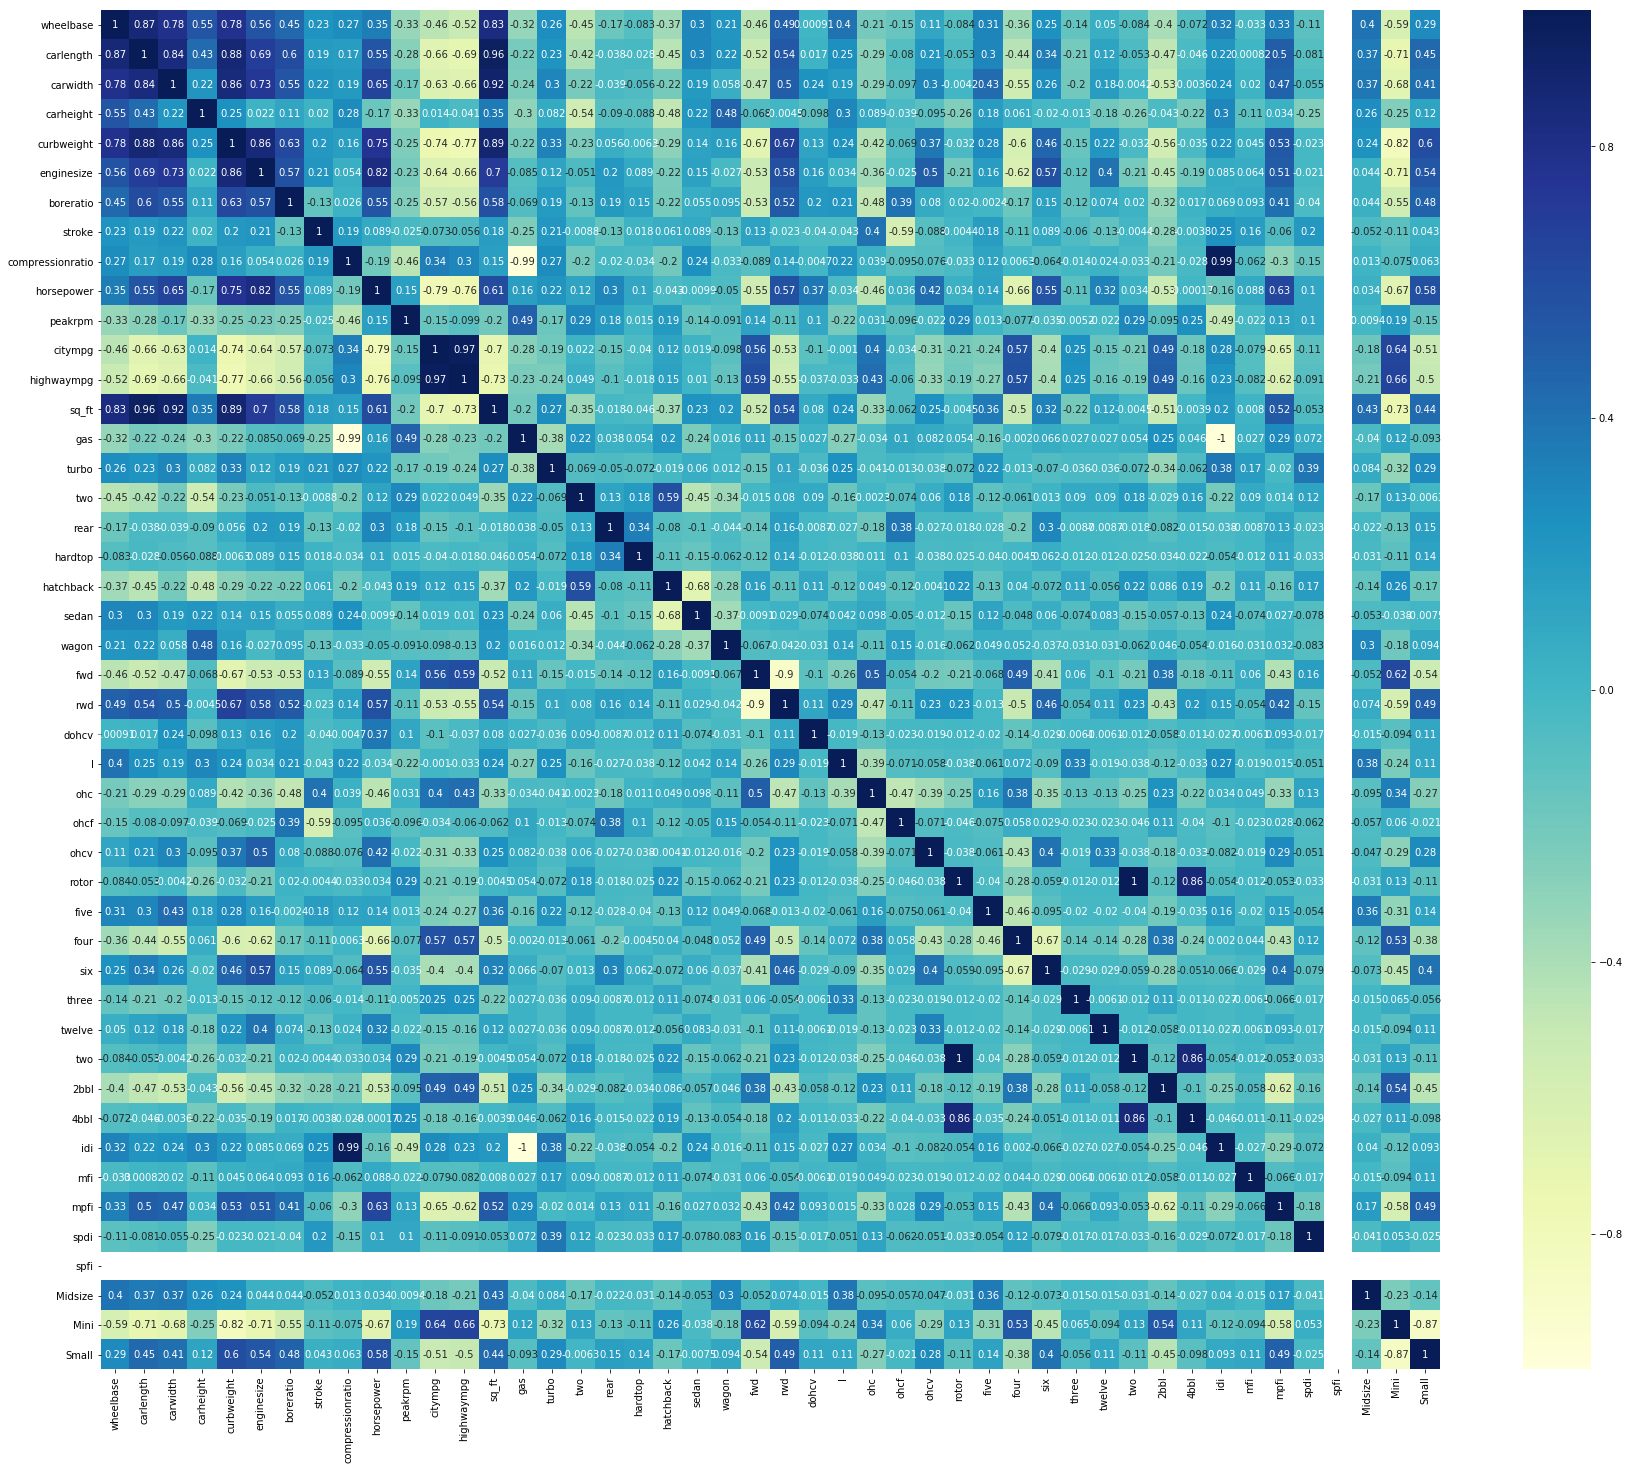

In [77]:
#Checking for correlations
plt.figure(figsize=(30,25))
sns.heatmap(df_train1.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [86]:
#generating the train data sets for Y and X
y_train=df_train.pop('price')
x_train=df_train

In [87]:
#Creating the model
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [88]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 22),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('enginesize', False, 29),
 ('boreratio', False, 7),
 ('stroke', True, 1),
 ('compressionratio', False, 14),
 ('horsepower', True, 1),
 ('peakrpm', False, 17),
 ('citympg', False, 18),
 ('highwaympg', False, 16),
 ('sq_ft', False, 31),
 ('gas', False, 11),
 ('turbo', False, 26),
 ('two', False, 27),
 ('rear', True, 1),
 ('hardtop', False, 4),
 ('hatchback', False, 5),
 ('sedan', False, 6),
 ('wagon', False, 3),
 ('fwd', False, 28),
 ('rwd', False, 21),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', True, 1),
 ('ohcf', False, 20),
 ('ohcv', False, 2),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 9),
 ('twelve', False, 10),
 ('two', False, 8),
 ('2bbl', False, 25),
 ('4bbl', False, 30),
 ('idi', False, 15),
 ('mfi', False, 12),
 ('mpfi', False, 24),
 ('spdi', False, 13),
 ('spfi', False, 32),
 ('Midsize', 

In [89]:
curr_cols=x_train.columns[rfe.support_]

###Building model using stats model for detailed statistics

In [90]:
x_train_rfe=x_train[curr_cols]

In [91]:
#importing the library and adding constant
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)

In [92]:
lm=sm.OLS(y_train,x_train_rfe).fit()

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     99.23
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           3.34e-69
Time:                        03:34:04   Log-Likelihood:                -1502.6
No. Observations:                 164   AIC:                             3037.
Df Residuals:                     148   BIC:                             3087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.39e+04   2584.201      5.378      0.0

In [93]:
x_train_rfe.columns

Index([u'const', u'carlength', u'carwidth', u'curbweight', u'stroke',
       u'horsepower', u'rear', u'dohcv', u'ohc', u'rotor', u'five', u'four',
       u'six', u'Midsize', u'Mini', u'Small'],
      dtype='object')

#Below process involves removing the columns with high P value and then re-building the model.
# It is an Iterative model till we get variables with P value less than 0.05

In [94]:
x_train_new=x_train_rfe.drop(['dohcv'],axis=1)

In [97]:
#Rebuilding the model with out the highwaympg column
import statsmodels.api as sm
x_train_lm1=sm.add_constant(x_train_new)

In [98]:
lm=sm.OLS(y_train,x_train_lm1).fit()

In [99]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           5.57e-70
Time:                        03:40:40   Log-Likelihood:                -1503.2
No. Observations:                 164   AIC:                             3036.
Df Residuals:                     149   BIC:                             3083.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.381e+04   2584.002      5.344      0.0

In [74]:
x_train_new.columns

Index([u'const', u'carlength', u'carwidth', u'curbweight', u'stroke',
       u'horsepower', u'rear', u'ohc', u'rotor', u'five', u'four', u'six',
       u'Midsize', u'Mini', u'Small'],
      dtype='object')

In [100]:
x_train_new1=x_train_new.drop(['rotor'],axis=1)

In [101]:
#Rebuilding the model with out the highwaympg column
import statsmodels.api as sm
x_train_lm2=sm.add_constant(x_train_new1)

In [102]:
lm=sm.OLS(y_train,x_train_lm2).fit()

In [313]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.01e-84
Time:                        08:40:03   Log-Likelihood:                -1472.6
No. Observations:                 164   AIC:                             2971.
Df Residuals:                     151   BIC:                             3012.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7309.7166    869.877      8.403      0.0

#With above step we have variables with P values less than 0.05
# Now we will check for VIF 
# it is also iterative process. Each time only one column with High VIF will be #removed and tested

In [107]:
#Calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif.to_frame()
#vif['VIF']=round(vif['VIF'].to_frame(),2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,173.450399
1,carlength,6.504437
2,carwidth,6.405734
3,curbweight,13.642106
4,stroke,1.612189
5,horsepower,4.153576
6,rear,1.323183
7,ohc,2.335078
8,five,3.156833
9,four,5.704686


In [108]:
x_train_new1=x_train_new1.drop(['const'],axis=1)

In [109]:
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,carlength,51.766501
1,carwidth,46.258153
2,curbweight,60.304828
3,stroke,20.966287
4,horsepower,11.705260
5,rear,1.331058
6,ohc,8.324315
7,five,3.143772
8,four,20.386616
9,six,3.709910


In [110]:
x_train_new1=x_train_new1.drop(['carlength'],axis=1)

In [111]:
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,carwidth,40.697307
1,curbweight,39.733266
2,stroke,20.787407
3,horsepower,10.994472
4,rear,1.329873
5,ohc,8.260873
6,five,3.131258
7,four,19.291786
8,six,3.478355
9,Midsize,2.131821


In [112]:
x_train_new1=x_train_new1.drop(['carwidth'],axis=1)
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,19.900952
1,stroke,20.692735
2,horsepower,10.263245
3,rear,1.298210
4,ohc,8.206604
5,five,3.034012
6,four,19.289188
7,six,3.405334
8,Midsize,1.949166
9,Mini,12.422641


In [113]:
x_train_new1=x_train_new1.drop(['stroke'],axis=1)
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,15.634858
1,horsepower,10.249973
2,rear,1.290596
3,ohc,5.954795
4,five,3.029541
5,four,19.253042
6,six,3.341111
7,Midsize,1.948249
8,Mini,11.416185
9,Small,7.794143


In [114]:
x_train_new1=x_train_new1.drop(['four'],axis=1)
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,12.931284
1,horsepower,9.036195
2,rear,1.264951
3,ohc,4.703739
4,five,1.532813
5,six,1.881556
6,Midsize,1.627546
7,Mini,5.305181
8,Small,5.074288


In [115]:
x_train_new1=x_train_new1.drop(['curbweight'],axis=1)
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,horsepower,4.919314
1,rear,1.145467
2,ohc,4.658597
3,five,1.510955
4,six,1.839779
5,Midsize,1.316263
6,Mini,4.798431
7,Small,4.106156


In [154]:
#Rebuilding the model after removing the variables with High VIF scores
#This time also we will remove columns with High P value
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train_new1)

In [117]:
lm=sm.OLS(y_train,x_train_lm).fit()

In [118]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     83.65
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           2.59e-52
Time:                        03:50:35   Log-Likelihood:                -1562.6
No. Observations:                 164   AIC:                             3143.
Df Residuals:                     155   BIC:                             3171.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.11e+04   2047.254     10.309      0.0

In [119]:
x_train_new1=x_train_new1.drop(['ohc'],axis=1)

In [120]:
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,horsepower,4.802356
1,rear,1.136503
2,five,1.337738
3,six,1.839713
4,Midsize,1.296248
5,Mini,1.634854
6,Small,3.113929


In [121]:
#Rebuilding the model with out the highwaympg column
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train_new1)

In [122]:
lm=sm.OLS(y_train,x_train_lm).fit()

In [123]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     95.36
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           4.46e-53
Time:                        03:52:38   Log-Likelihood:                -1563.2
No. Observations:                 164   AIC:                             3142.
Df Residuals:                     156   BIC:                             3167.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.173e+04   1961.237     11.080      0.0

In [124]:
x_train_new1=x_train_new1.drop(['six'],axis=1)

In [125]:
#Rebuilding the model with out the highwaympg column
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train_new1)
lm=sm.OLS(y_train,x_train_lm).fit()

In [126]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           7.73e-54
Time:                        03:56:34   Log-Likelihood:                -1563.9
No. Observations:                 164   AIC:                             3142.
Df Residuals:                     157   BIC:                             3164.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.215e+04   1928.451     11.487      0.0

In [127]:
vif=pd.DataFrame()
x=x_train_new1
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['VIF']=round(vif['VIF'],2)
#vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,horsepower,3.873339
1,rear,1.106341
2,five,1.281285
3,Midsize,1.290600
4,Mini,1.512041
5,Small,3.113887


# RESIDUAL ANALYSIS OF THE MODEL

In [128]:
y_train_price=lm.predict(x_train_lm)

In [129]:
%matplotlib inline

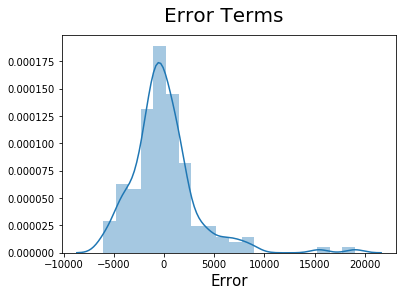

In [130]:
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Error', fontsize=15)


#PREDICTION ON TEST SET

In [132]:
#declaring the variables to be scaled
vars=['wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio',
      'horsepower','peakrpm','citympg','highwaympg']

In [133]:
#scaling of variables
df_test[vars]=scaler.transform(df_test[vars])

In [134]:
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Midsize,Mini,Small
160,0.313793,0.409756,0.341667,0.433333,0.235066,98,0.404762,0.424242,0.12500,0.091667,...,1,0,0,0,0,0,0,0,1,0
186,0.368966,0.497561,0.433333,0.658333,0.305275,109,0.404762,0.611111,0.12500,0.154167,...,0,0,0,0,1,0,0,0,1,0
59,0.420690,0.596748,0.516667,0.491667,0.347944,122,0.563492,0.606061,0.10000,0.150000,...,1,0,0,0,0,0,0,0,1,0
165,0.272414,0.448780,0.308333,0.400000,0.301396,98,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,1,0,0,0,1,0
140,0.231034,0.263415,0.291667,0.658333,0.291699,108,0.746032,0.227273,0.10625,0.104167,...,1,0,0,0,0,0,0,0,1,0


In [135]:
#splitting into x and y
y_test=df_test.pop('price')
x_test=df_test

In [137]:
#making predictions
x_train_new1.columns
x_test_new=x_test[x_train_new1.columns]
#adding constant
x_test_new=sm.add_constant(x_test_new)

In [138]:
#make prediction
y_pred=lm.predict(x_test_new)

#EVALUATION OF TEST BY COMPARING THE Y_TEST AND Y_PRED

In [140]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.80724699661606591

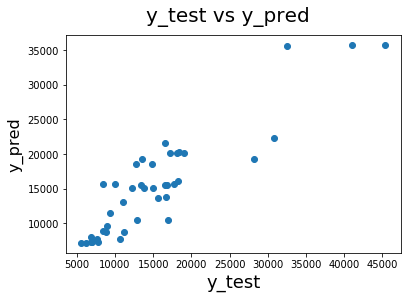

In [141]:
#scatter plot to understand the distribution of the data for y_test, y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

In [142]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           7.73e-54
Time:                        04:32:55   Log-Likelihood:                -1563.9
No. Observations:                 164   AIC:                             3142.
Df Residuals:                     157   BIC:                             3164.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.215e+04   1928.451     11.487      0.0

In [155]:
# With above model we are able to explain the nearly 81% of variation
# we have identified 6 columns are the critical variables for the prediction